In [27]:
# Social Media Trend Analysis
#Objective**: Analyze trending topics and sentiment using social media post data.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import re

In [18]:
#load the data
df = pd.read_csv('../data/sentimentdataset.csv')
print(df.head())

   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes     

In [22]:
# Data Infor
print(df.info())

#check for mising values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB
None
Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User  

In [23]:
print("Shape:", df.shape)

Shape: (732, 15)


In [24]:
print("Columns:", df.columns)

Columns: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')


In [25]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [29]:
# make the text column to string ensuring consistency in the data
df['Text'] = df['Text'].astype(str)
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [31]:
# Save the  Cleaned Dataset
df.to_csv('../data/cleaned_sentimentdataset.csv', index=False)

In [ ]:
# Sentiment Distribution
This section shows how posts are distributed across positive, neutral, and negative sentiments.

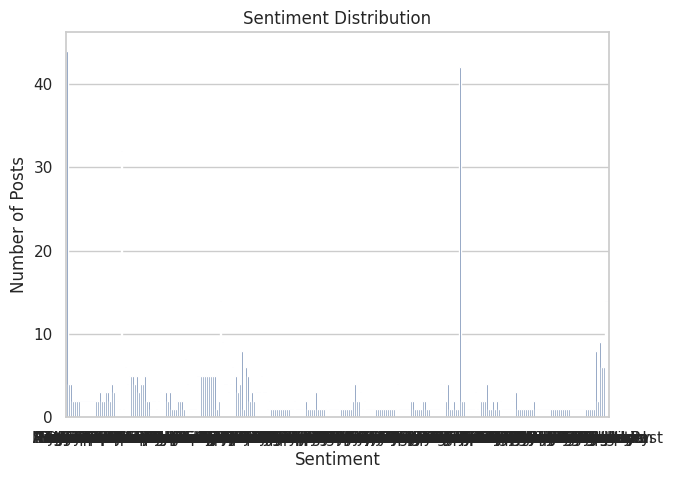

In [35]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Sentiment')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.savefig('../outputs/sentiment_distribution.png')
plt.show()


In [ ]:
#Word Cloud for trending topics
The word cloud displays the most frequent words used in all posts, offering insight into trending topics.


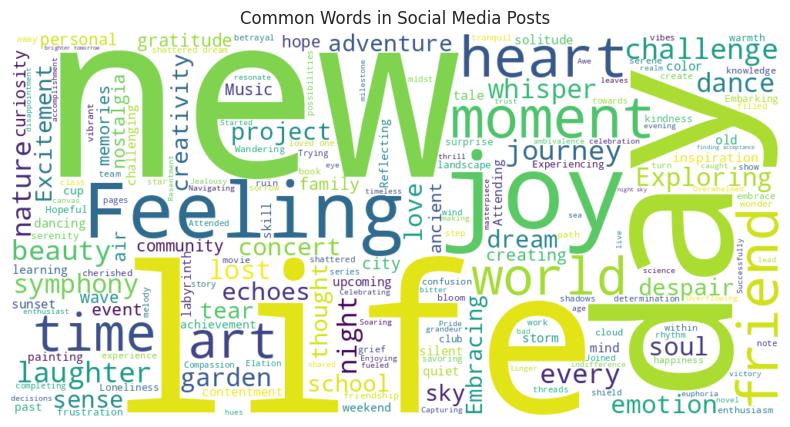

In [36]:
all_text = ' '.join(df['Text'])
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Social Media Posts')
plt.savefig('../outputs/wordcloud.png')
plt.show()


In [ ]:
#Platform Analysis to break down how many posts came from each social media platform.


/tmp/ipykernel_40834/4013606211.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Platform', order=df['Platform'].value_counts().index, palette='Set2')


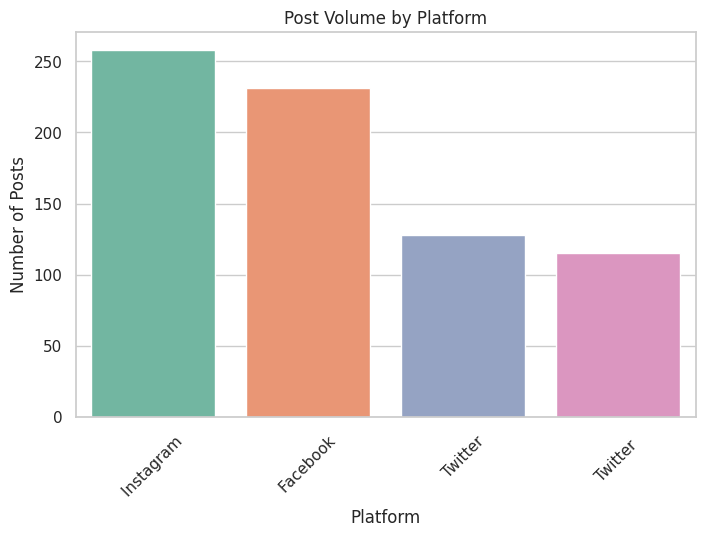

In [39]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Platform', order=df['Platform'].value_counts().index, palette='Set2')
plt.title('Post Volume by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.savefig('../outputs/platform_distribution.png')
plt.show()


In [ ]:
#analysis of the most frequently used hashtags to understand trending topics across posts.

/tmp/ipykernel_40834/3319356060.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hashtags.values, y=top_hashtags.index, palette='magma')


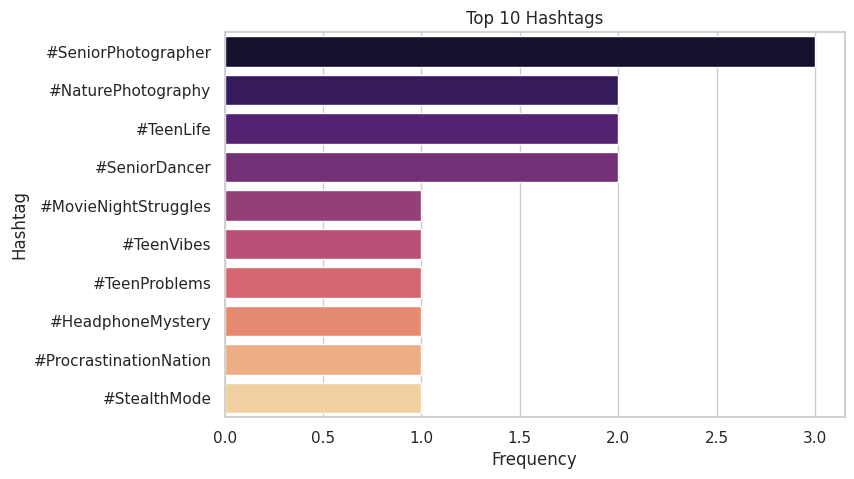

In [40]:
# Extract hashtags using regex
hashtag_series = df['Text'].str.extractall(r'(#[\w\d]+)')[0]

# Count and plot top 10 hashtags
top_hashtags = hashtag_series.value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_hashtags.values, y=top_hashtags.index, palette='magma')
plt.title('Top 10 Hashtags')
plt.xlabel('Frequency')
plt.ylabel('Hashtag')
plt.savefig('../outputs/top_hashtags.png')
plt.show()
